In [ ]:
import numpy as np 
import pandas as pd 
from scipy import stats    
import matplotlib.pyplot as plt 
#import seaborn as sns     # 시각화
#from sklearn import preprocessing

In [ ]:
# 구글드라이브에 파일 업로드하면 colab 상에서 이용가능
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# colab에서 matplotlib 한글폰트 설정1
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# colab에서 matplotlib 한글폰트 설정2
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

# 런타임 다시 시작

In [ ]:
# PresidentsParty.CSV

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PresidentsParty.CSV', index_col = 0)
df

In [ ]:
# isin(values)
# values = iterable(list, tuple), Series, DataFrame or dict
# Series, DataFrame에 적용가능
# True, False로 출력 -> indexing 에 사용

In [ ]:
# 1. 2회 연임 대통령 데이터프레임으로 출력하기
# isin( , , , ,): True or False로 출력
freq = df['President'].value_counts()
# freq

freq[freq == 2].index

#df.isin(freq[freq == 2].index)  # Party는 all false
df[df['President'].isin(freq[freq == 2].index)]

In [ ]:
# 2. 취임횟수 2회가 아닌 대통령 데이터프레임
# ~: not
df[df.President.isin(freq[freq != 2].index)]
df[~(df.President.isin(freq[freq == 2].index))]

In [ ]:
# 3. Republican과 Democrat을 제외한 정당을 모두 ETC로 변환하여 bar plot으로 나타내기
df.Party[~df.Party.isin(['Republican', 'Democrat'])] = 'ETC'
# df
df.Party.value_counts()
# df.Party.value_counts().plot.bar()

In [ ]:
 df.head(10)

In [ ]:
# value_counts()
df.value_counts()
df.Party.value_counts()

# groupby():splitting the object, applying a function, and combining the results
df.groupby('Party').size()
df.groupby(['Party','President']).size()   # Party: 상위기준, President: 하위기준

In [ ]:
df.groupby(['Party','President']).size().plot.bar(figsize=(8,3))
plt.yticks(range(4))

In [ ]:
# hierarchical indexing
new_freq = df.groupby(['Party','President']).size()
new_freq['Democrat']
# new_freq['President'] error

In [ ]:
# 4. 2회 이상 연임한 Democrat, Republican 정당의 대통령을 추출하여 시각화하기
new_freq = df.groupby(['Party','President']).size()
# new_freq
# new_freq>=2
new_freq[new_freq>=2][['Democrat','Republican']]   # Fancy indexing, 상위기준(Party)

In [ ]:
new_freq[new_freq>=2][['Democrat','Republican']].plot.bar(figsize=(5,3))
plt.yticks(range(4))

In [ ]:
# 5. 상위 계층: Party, 하위 계층: 취임횟수인 Series 만들기

new_series = df.groupby(['Party', 'President']).size().groupby('Party').value_counts()

# df.groupby(['Party', 'President']).size()
# df.groupby(['Party']).size()
df.groupby(['Party', 'President']).size().groupby('Party').value_counts()

# df.groupby(['Party', 'President']).size().groupby('Party').size()  == df.groupby(['Party']).size()

In [ ]:
# unstack(level=-1, fill_value=None): pivot a level of the (necessarily hierarchical) index labels
# Unstack, also known as pivot, Series with MultiIndex to produce DataFrame.

In [ ]:
new_df = new_series.unstack(level=1, fill_value = 0)     # 상위기준이 row, 하위기준이 column/ level = -1 도 가능
new_series.unstack(level=1, fill_value = 0) 
# new_series.unstack(level=0, fill_value = 0)
# new_series.unstack(level='Party', fill_value = 0)

In [ ]:
# stack(level = -1, dropna=True): Stack the prescribed level(s) from columns to index, inverse operation from unstack
new_df.stack()     # column 기준 하나이므로 Series로 출력

In [ ]:
# pivot(index=None, columns=None, values=None): Pivot a table based on column values, DataFrame으로 출력
# Return reshaped DataFrame organized by given index / column values

In [ ]:
before_pivot = pd.DataFrame({'lv1': ['one', 'one', 'one', 'two', 'two', 'two'], 
                             'lv2': ['A', 'B', 'C', 'A', 'B', 'C'], 
                             'ver': [1, 2, 3, 4, 5, 6], 
                             'hor': ['e', 's', 'l', 'c', 'o', 'n']})

before_pivot

In [ ]:
before_pivot.pivot(index='lv1', columns='lv2', values='ver')
before_pivot.pivot(index='lv1', columns='lv2')
before_pivot.pivot(index='lv1', columns='lv2')['hor']

after_pivot = before_pivot.pivot(index='lv1', columns='lv2')
after_pivot

In [ ]:
after_pivot.stack()

In [ ]:
new_df

Text(0.5, 1.0, '정당별 역대 미국 대통령 동일 인물 취임 횟수')

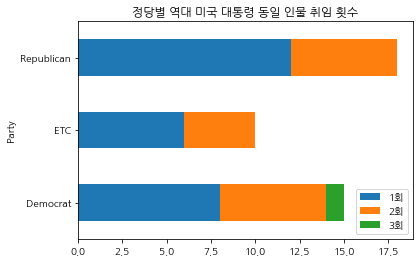

In [ ]:
new_df.columns = [str(i) + '회' for i in new_df.columns]
new_df.plot.barh(stacked = True)
plt.title('정당별 역대 미국 대통령 동일 인물 취임 횟수')

In [ ]:
# 카이제곱 검정 // 값이 많지 않으므로 해당 데이터셋에는 Fisher's exact test가 더 적절함
# 교차분할표(contingency table) 사용


In [ ]:
from scipy.stats import chi2_contingency
chi2, p, df, expected = chi2_contingency(new_df)
print(f'Chi2: {chi2}\np-value: {p}\nDF: {df}')
print('Expected:\n', expected)      # expected(기대빈도) > 5인 값이 80%이상일 것

Chi2: 2.232692307692308
p-value: 0.6930486609369784
DF: 4
Expected:
 [[ 9.06976744  5.58139535  0.34883721]
 [ 6.04651163  3.72093023  0.23255814]
 [10.88372093  6.69767442  0.41860465]]


In [ ]:
# AmeriacFreedom.CSV
# 각 미국 대통령의 취임연설문에서 'America'와 'Freedom'이 쓰인 비율
# index: 미국 대통령의 취임연도

In [ ]:
import pandas as pd
Address = pd.read_csv('/content/drive/MyDrive/AmericaFreedom.CSV', index_col = 0)
Address.head()
#Address.shape

,America,Freedom
1789,0.000000,0.000000
1793,0.000000,0.000000
1797,0.001726,0.000000
1801,0.000000,0.002317
1805,0.000000,0.000923


In [ ]:
Address.describe()

In [ ]:
Address.boxplot()
# 정규분포 : mean
# 비정규분포: median, IQR

Text(0.5, 1.0, '추세도')

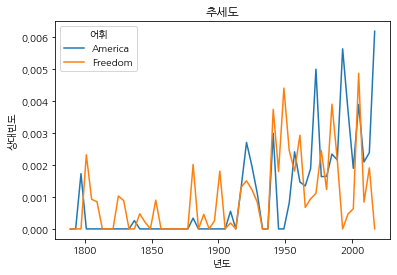

In [ ]:
Address.columns.name = '어휘'
Address.plot()
plt.xlabel('년도')
plt.ylabel('상대빈도')
plt.title('추세도')

In [ ]:
import numpy as np
#def polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
a, b = np.polyfit(Address['America'],
                 Address['Freedom'],1)
plt.scatter(Address['America'], Address['Freedom'])
plt.xlabel('Amercia')
plt.ylabel('Freedom')
plt.plot(Address['America'], (a*Address['America'])+b, '-r')

In [ ]:
# America와 Freedom 상관분석
# Pearson: 정규분포, 선형성 가정
# Kendall: 비정규분포, 특이값에 민감X,
# Spearman: 비정규분포, 특이값에 민감
Address.corr(method='pearson')    
Address.corr(method='spearman')
Address.corr(method='kendall')

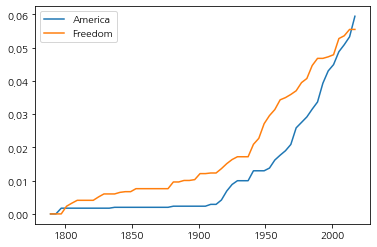

In [ ]:
Address.cumsum().plot()

#추론통계: 가설검정</br></br>
1. 표본이 2개일 때</br>
 [1] 정규분포</br>
(1) 정규성 검정: shapiro</br>
 p-value< 0.05 비정규분포 / p-value >= 0.05 정규분포 </br></br>
(2) F등분산 검정: levene</br>
p-value < 0.05 이분산 / p-value >= 0.05 등분산</br></br>
(3)two-sample t-test: mean 비교</br>
p-value < 0.05 두 표본평균 유의한 차이 존재 </br></br>

 [2] 비정규분포</br>
(1) 정규성 검정: shapiro</br>
(2)two-sample WIlcoxon rank sum test: median 비교
p-value < 0.05 두 표본중앙값 유의한 차이 존재 </br></br>


In [ ]:
#(1) 정규성 검정
# p-value< 0.05 비정규분포 / p-value >= 0.05 정규분포


from scipy import stats
Address.apply(stats.shapiro)


# index = 0: W(통계량)
# index = 1:  p-value

어휘,America,Freedom
0,7.213426e-01,7.913462e-01
1,3.554743e-09,1.196102e-07


In [ ]:
#(2) F 등분산 검정: 정상성 가정, 두 표본의 분산이 같은지 검정
# p-value < 0.05 이분산 / p-value >= 0.05 등분산
#(Bartlett 검증, Cochran 검증, Levene 검증, Scheffe 검증)

stats.levene(Address.America, Address.Freedom)

LeveneResult(statistic=0.35308373335847815, pvalue=0.5535500548129513)

In [ ]:
#(3) two-sample t-test: mean 비교
# p-value < 0.05 mean 유의미한 차이 존재

# 3-1 등분산 t-test(default)
stats.ttest_ind(Address.America, Address.Freedom, equal_var = True)

# 3-2 이분산 t-test
stats.ttest_int(Address.America, Address.Freedom, equal_var = False)

Ttest_indResult(statistic=0.2673571791980549, pvalue=0.7896772487131498)

In [ ]:
# two-sample WIlcoxon rank sum test: 비정규분포, median 비교
# p-value < 0.05 median 유의미한 차이 존재

stats.ranksums(Address.America, Address.Freedom)

RanksumsResult(statistic=-0.6515559361724235, pvalue=0.5146876813237625)

In [ ]:
# America와 Freedom 의 평균/중앙값에서 유의미한 차이 없다는 결론

Text(0.5, 1.0, '추세도')

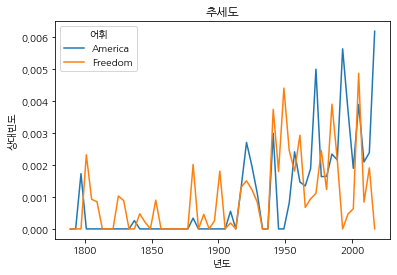

In [ ]:
Address.columns.name = '어휘'
Address.plot()
plt.xlabel('년도')
plt.ylabel('상대빈도')
plt.title('추세도')

In [ ]:
# 20세기 이후의 데이터만 추출, 2차세계대전을 기점으로 시대구분

after_20C = Address.loc[Address.index >= 1900]

Address_20C = pd.concat([after_20C, pd.DataFrame({'Period': ['|' if i < 1950 else '||'
                             for i in Address.index[Address.index >=1900]]},
                 index = Address.index[Address.index >= 1900])], axis = 1)
Address_20C

In [ ]:
Address_20C.head()

|          AxesSubplot(0.1,0.15;0.363636x0.75)
||    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

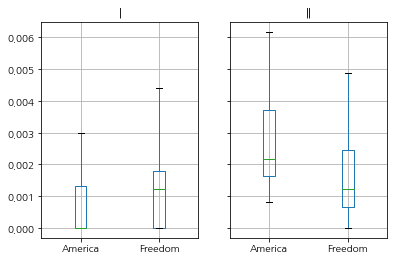

In [ ]:
Address_20C.groupby(['Period']).boxplot()

In [ ]:
# America에 대한 Period | 표본과 Period || 표본의 정규성 검정

Address_20C[['America','Period']].groupby(['Period']).apply(stats.shapiro)

Period
|     (0.7653388381004333, 0.002718827221542597)
||      (0.8532366752624512, 0.0120198093354702)
dtype: object

In [ ]:
# 비정규분포
stats.ranksums(Address_20C.America[Address_20C.Period=='I'],
              Address_20C.America[Address_20C.Period=='||'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

In [ ]:
# Period |과 || 의 America 언급량이 통계적으로 유의미한 차이 존재

stats.ranksums(Address_20C.America[Address_20C.Period=='|'],
            Address_20C.America[Address_20C.Period=='||'])

RanksumsResult(statistic=-3.243510750860898, pvalue=0.0011806635490339812)

In [ ]:
# Freedom에 대한 Period | 표본과 Period || 표본의 정규성 검정

Address_20C[['Freedom','Period']].groupby(['Period']).apply(stats.shapiro)

# | 정규분포, || 비정규분포

Period
|     (0.8378305435180664, 0.019888868555426598)
||      (0.926120400428772, 0.18733899295330048)
dtype: object

In [ ]:
# 비정규분포 가정

stats.ranksums(Address_20C.Freedom[Address_20C.Period=='|'],
            Address_20C.Freedom[Address_20C.Period=='||'])

RanksumsResult(statistic=-0.9625902873522665, pvalue=0.33575317363085)

In [ ]:
# 정규분포 가정 - 등분산 검정 

stats.levene(Address_20C.Freedom[Address_20C.Period=='|'],
            Address_20C.Freedom[Address_20C.Period=='||'])

LeveneResult(statistic=0.00043800557684377, pvalue=0.9834510577555695)

In [ ]:
# 정규분포 가정 - t-test
stats.ttest_ind(Address_20C.Freedom[Address_20C.Period=='|'],
            Address_20C.Freedom[Address_20C.Period=='||'],
               equal_var = True)

Ttest_indResult(statistic=-0.7360121994678185, pvalue=0.4678448591715145)

In [ ]:
# Freedom은 America와 달리 언급량이 시대적으로 차이가 없음. pattern 재탐색

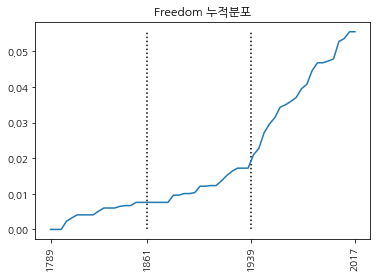

In [ ]:
a = Address.Freedom.cumsum()
a.plot()
plt.title('Freedom 누적분포')
plt.xticks([Address.index[0], 1861, 1939,  Address.index[-1]],
          rotation = 90)
plt.vlines([1861,1939], 0, a.max(), linestyle = ':')

In [ ]:
df_Freedom = pd.concat([pd.DataFrame(Address.Freedom),
                     pd.DataFrame({'Period': ['|' if i < 1861 else '||'
                                              if i < 1939 else '|||'
                                              for i in Address.Freedom.index]},
                                  index = Address.index)], axis = 1)

In [ ]:
df_Freedom.head()

,Freedom,Period
1789,0.000000,|
1793,0.000000,|
1797,0.000000,|
1801,0.002317,|
1805,0.000923,|


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


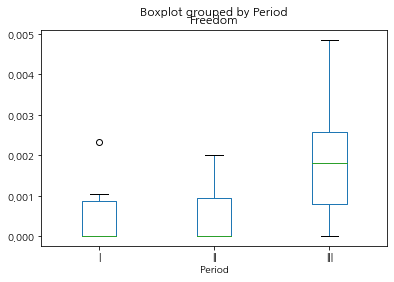

In [ ]:
df_Freedom.boxplot(column = 'Freedom', by = 'Period', grid = False)

추론통계: 가설검정</br></br>
2. 표본 3개 이상</br></br>

[1] 정규분포(등분산)</br>
(1) 정규성 검정: ols</br>
 p-value< 0.05 비정규분포 / p-value >= 0.05 정규분포 </br></br>
(2) F등분산 검정: levene</br>
p-value < 0.05 이분산 / p-value >= 0.05 등분산</br></br>
(3) one-way ANOVA: mean 비교</br>
p-value < 0.05 표본평균간 유의한 차이 존재 </br></br>
(4) 사후검정: TukeyHSD</br>
어떤 표본집단 간에 평균 차이가 존재하는지 검정</br></br>


[2] 비정규분포, 정규분포(이분산)</br>
(1) 정규성 검정: ols</br>
 p-value< 0.05 비정규분포 / p-value >= 0.05 정규분포 </br></br>
(2) F등분산 검정: levene</br>
p-value < 0.05 이분산 / p-value >= 0.05 등분산</br></br>
(3) Kruskal-Wallis: median 비교</br>
p-value < 0.05 표본 중앙값간 유의한 차이 존재 </br></br>
(4) 사후검정: Dunn</br>

In [ ]:
# 정규분포(등분산)
#(1) 정규성 검정
# ols 기반 선형 모델을 만들고 잔차를 대상으로 정규성 검정
# ols('종속변수 ~ C(독립변수)', data=dataFrame)

from statsmodels.formula.api import ols
model = ols('Freedom ~ C(Period)', data = df_Freedom).fit()
stats.shapiro(model.resid)

(0.9211161732673645, 0.001058013178408146)

In [ ]:
#(2) 등분산 검정

stats.levene(df_Freedom.Freedom[df_Freedom.Period=='|'], df_Freedom.Freedom[df_Freedom.Period=='||'], df_Freedom.Freedom[df_Freedom.Period=='|||'])

#이분산

LeveneResult(statistic=5.892721142064274, pvalue=0.004799812634807271)

In [ ]:
#(3) one-way ANOVA (등분산의 경우)

stats.f_oneway(df_Freedom.Freedom[df_Freedom.Period=='|'], df_Freedom.Freedom[df_Freedom.Period=='||'], df_Freedom.Freedom[df_Freedom.Period=='|||'])

# p-value < 0.05: 표본집단의 평균간 유의미한 차이 존재

F_onewayResult(statistic=13.87557878517657, pvalue=1.3218641542916707e-05)

In [ ]:
#(4) 사후검정: 어떤 표본집단 간에 평균 차이가 존재하는지 검정
# TukeyHSD

from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(df_Freedom.Freedom, df_Freedom.Period)
hsd.summary()

# Period |||이 |&||과 유의미한 차이를 보임

group1,group2,meandiff,p-adj,lower,upper,reject
|,||,0.0001,0.9,-0.0007,0.0008,False
|,|||,0.0015,0.001,0.0007,0.0023,True
||,|||,0.0014,0.001,0.0007,0.0022,True


In [ ]:
#비정규분포
# (3) Kruskal-Wallis

stats.kruskal(df_Freedom.Freedom[df_Freedom.Period=='|'], df_Freedom.Freedom[df_Freedom.Period=='||'], df_Freedom.Freedom[df_Freedom.Period=='|||'])

KruskalResult(statistic=17.784286292262617, pvalue=0.00013746473504788813)

In [ ]:
!pip install scikit_posthocs 

     |████████████████████████████████| 43 kB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=aee66ce713f2f8f4b08305712caf4bb3c170420b89ee0ffff8b3f053f43325e7
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [ ]:
# (4) 사후검정: Dunn

import scikit_posthocs as sp
sp.posthoc_dunn(df_Freedom, val_col = 'Freedom', group_col = 'Period')

,|,||,|||
|,1.000000,0.892282,0.000257
||,0.892282,1.000000,0.000299
|||,0.000257,0.000299,1.000000


In [ ]:
# Two-way ANOVA

In [ ]:
Presidents = pd.read_csv('/content/drive/MyDrive/US_Presidents.CSV', index_col = 0)
FreedomParty = pd.concat([df_Freedom, Presidents.Party.loc[Address.index]],
                        axis = 1)
FreedomParty = FreedomParty.loc[FreedomParty.index >= 1869]
FreedomParty

In [ ]:
FreedomParty.boxplot(column = 'Freedom', by = ['Period', 'Party'], grid = False)

In [ ]:
from statsmodels.formula.api import ols
model = ols('Freedom ~ C(Period) + C(Party) + C(Period):C(Party)', data = FreedomParty).fit()
stats.shapiro(model.resid)

(0.9589298963546753, 0.16423533856868744)

In [ ]:
from statsmodels.stats.anova import anova_lm
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Period),1.0,1.654448e-05,1.654448e-05,11.786039,0.001550
C(Party),1.0,5.855411e-07,5.855411e-07,0.417131,0.522584
C(Period):C(Party),1.0,7.737728e-07,7.737728e-07,0.551224,0.462772
Residual,35.0,4.913073e-05,1.403735e-06,NaN,NaN
